In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Going to learn about CNN Architecture Using MNIST Dataset!**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

print("libraries imported")

# sns.set used to make plots cute, default setting is not-cute
sns.set(style='white', context='notebook', palette='deep')


2025-07-13 17:45:16.316471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752428716.491534      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752428716.545160      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


libraries imported


In [4]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print("dn")

dn


In [5]:
train.sample(10)
# it have one label (digit) and 784 pixel (28*28 image size) -> higher the value of pixel more dark it is (0-255)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38732,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3686,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30090,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31205,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11331,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22883,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26503,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27313,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35521,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train.drop(labels = ["label"], axis=1)
y_train = train["label"]

print("dn")

dn


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

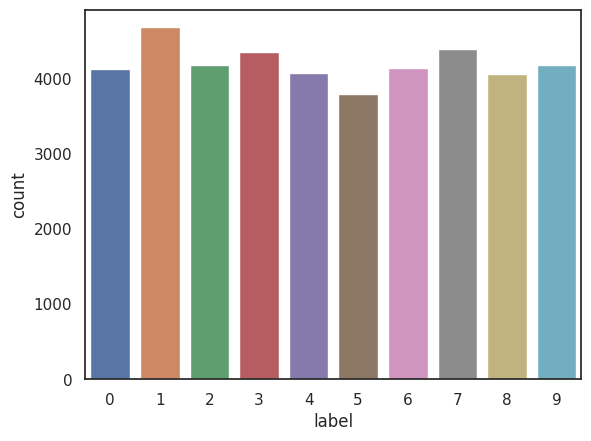

In [7]:
g = sns.countplot(x=y_train)
y_train.value_counts()
# nice nice, the data is balanced, CNN will work nicely

In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

**There is no missing value in data set**

In [10]:
# Normalizing the data -> as i said values are between (0-255) if we reduce it to (0-1) then our model converges fas fas
X_train = X_train / 255.0
test = test / 255.0

In [11]:
test.sample(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_train.shape 
# to train CNN model we need to convert this in 3-D 

(42000, 784)

In [13]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)


In [14]:
X_train.shape 
# see see we split the images data, we used -1 (then it will identify automatically about the dimensions of data), we used only one channel (generally 3 used, RGB)

(42000, 28, 28, 1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [15]:
y_train = to_categorical(y_train, num_classes=10)


num_classes = len(np.unique(Y_train))
Y_train = to_categorical(Y_train, num_classes=num_classes)

np.unique() gets all unique class labels

len(...) counts how many classes you have

Instead of hardcoding num_classes = 10, use this to make it dynamic

If i use a smaller number than actual unique values,will get index errors

If i use a larger number, wasting space and might confuse the model

In [16]:
y_train.shape

(42000, 10)

In [17]:
# going to split the training and validation set
X_train,X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.1, random_state = 42)

i choose a small fraction (10%) for the validation set on which the model is evaluated and the rest (90%) is used to train the model.

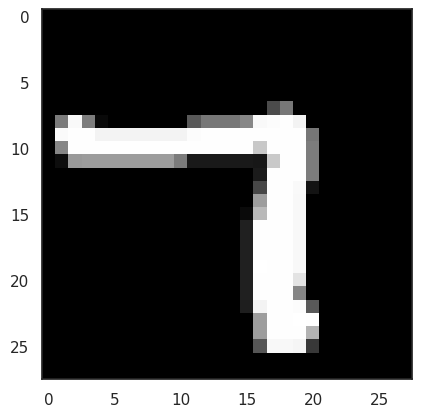

In [18]:
plt.imshow(X_train[5][:,:,0],cmap='gray')

In [21]:
X_train.head() # not working because, X_train is no longer a Pandas DataFrame — it's a NumPy array after reshaping.X_train is a 4D NumPy array, and NumPy arrays don’t have .head().

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [20]:
X_train[0].shape #shape of index 0 image

(28, 28, 1)

**NOW GOING TO DEFINE CNN MODEL :)**

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(5,5), padding='same',activation= 'relu',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size=(5,5), padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same',activation= 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= "softmax"))

print("dn")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752428765.917079      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


dn


In [23]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [24]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',   
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001            
)

In [27]:
epochs = 30 
batch_size = 86

In [32]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, y_val),
    verbose=2,
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[learning_rate_reduction]
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1752428896.513167     100 service.cc:148] XLA service 0x7e0a7000b5c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752428896.514058     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752428896.806564     100 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752428900.443420     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 - 20s - 45ms/step - accuracy: 0.8708 - loss: 0.4057 - val_accuracy: 0.9848 - val_loss: 0.0539 - learning_rate: 0.0010
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


439/439 - 1s - 1ms/step - accuracy: 0.9651 - loss: 0.1508 - val_accuracy: 0.9817 - val_loss: 0.0669 - learning_rate: 0.0010
Epoch 3/30
439/439 - 10s - 22ms/step - accuracy: 0.9615 - loss: 0.1299 - val_accuracy: 0.9883 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 4/30
439/439 - 0s - 732us/step - accuracy: 0.9651 - loss: 0.0771 - val_accuracy: 0.9864 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 5/30
439/439 - 10s - 22ms/step - accuracy: 0.9730 - loss: 0.0946 - val_accuracy: 0.9900 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 6/30
439/439 - 0s - 726us/step - accuracy: 0.9884 - loss: 0.0483 - val_accuracy: 0.9907 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 7/30
439/439 - 10s - 22ms/step - accuracy: 0.9771 - loss: 0.0757 - val_accuracy: 0.9890 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 8/30
439/439 - 0s - 734us/step - accuracy: 0.9884 - loss: 0.0493 - val_accuracy: 0.9895 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 9/30
439/439 - 10s - 22ms/step - accuracy: 0.979

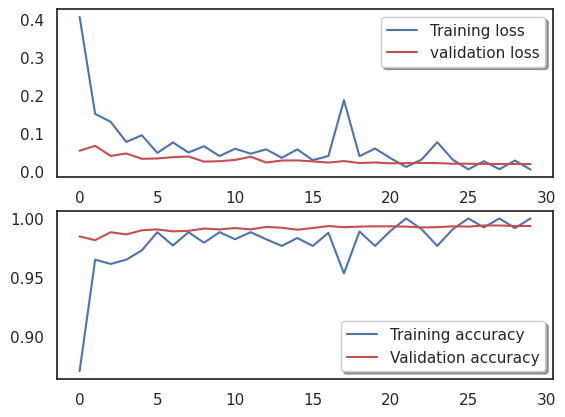

In [33]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


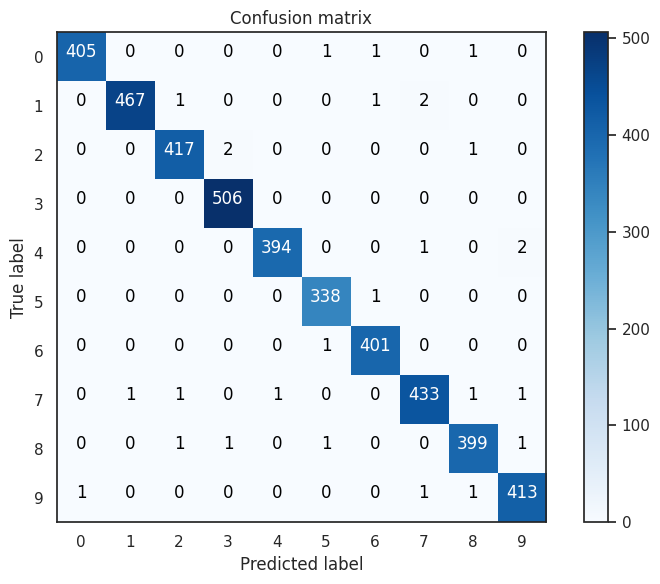

In [34]:

# Plot confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.0f}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Predictions
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(conf_mtx, classes=range(10))


In [35]:
print(f"Last Epoch Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Last Epoch Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

Last Epoch Training Accuracy: 100.00%
Last Epoch Validation Accuracy: 99.36%


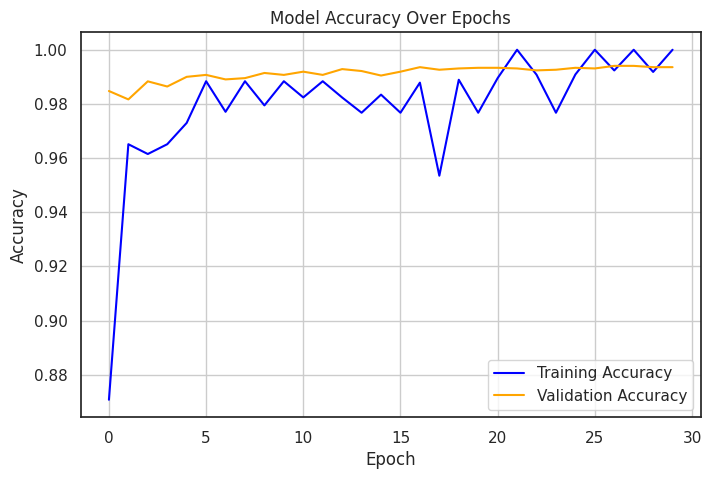

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
print(history.history['accuracy'])        # Should show list of floats like [0.8, 0.9, ...]
print(history.history['val_accuracy'])    # Same here


[0.8707641959190369, 0.9651162624359131, 0.9614996910095215, 0.9651162624359131, 0.9729808568954468, 0.9883720874786377, 0.9770907163619995, 0.9883720874786377, 0.9794505834579468, 0.9883720874786377, 0.9823938012123108, 0.9883720874786377, 0.9823672771453857, 0.9767441749572754, 0.983427882194519, 0.9767441749572754, 0.9878559708595276, 0.9534883499145508, 0.9889165759086609, 0.9767441749572754, 0.9895264506340027, 1.0, 0.9907991886138916, 0.9767441749572754, 0.990878701210022, 1.0, 0.9923635721206665, 1.0, 0.9918067455291748, 1.0]
[0.9847618937492371, 0.9816666841506958, 0.9883333444595337, 0.9864285588264465, 0.9900000095367432, 0.9907143115997314, 0.989047646522522, 0.9895238280296326, 0.991428554058075, 0.9907143115997314, 0.9919047355651855, 0.9907143115997314, 0.9928571581840515, 0.9921428561210632, 0.9904761910438538, 0.9919047355651855, 0.993571400642395, 0.9926190376281738, 0.9930952191352844, 0.9933333396911621, 0.9933333396911621, 0.9930952191352844, 0.9923809766769409, 0.9

In [39]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [42]:
from IPython.display import FileLink
FileLink('cnn_mnist_datagen.csv')


/kaggle/working/cnn_mnist_datagen.csv

**All credit goes to him** : https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

I learned alot from this project, will improve/learn further :)